# Peta Chloropeth Curah Hujan 10 Provinsi Jawa Barat

Ariq Hakim Ruswadi - 140810200001

In [1]:
import geopandas as gpd
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
map = gpd.read_file('./maps/kota/BATAS KABUPATEN KOTA DESEMBER 2019 DUKCAPIL.shp')

<AxesSubplot:>

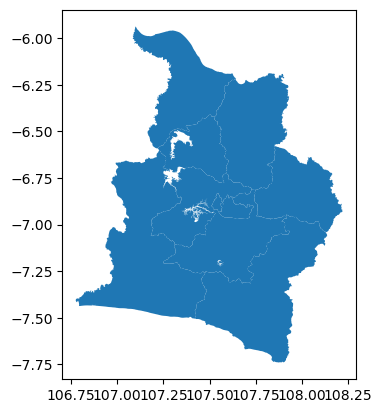

In [3]:
jawa_barat = ['BANDUNG', 'BANDUNG BARAT', 'SUBANG', 
              'KOTA BANDUNG', 'CIANJUR', 'KOTA CIMAHI', 
              'GARUT', 'PURWAKARTA', 'KARAWANG', 'SUMEDANG']
map_jabar = map[map['KAB_KOTA'].isin(jawa_barat)]
map_jabar.plot()

In [5]:
data_curah_hujan = pd.read_csv('./datasets/curah_hujan_jawa_barat.csv', sep=';')
data_curah_hujan.head()

,KAB_KOTA,2018,2019,2020,2021,2022,AVG
0,BANDUNG,7.91,6.59,10.99,9.82,9.41,8.94
1,BANDUNG BARAT,7.91,6.59,10.99,9.82,9.41,8.94
2,CIANJUR,7.03,6.59,10.55,9.26,9.20,8.52
3,GARUT,5.71,5.71,10.55,8.13,8.17,7.66
4,KARAWANG,4.83,5.71,6.15,8.46,6.41,6.31


In [6]:
data = data_curah_hujan['AVG'].tolist()
data
average = np.mean(data, dtype=float)
std = np.std(data, ddof=0)
n = 1
upper_limit = average + n * std
lower_limit = average - n * std

In [7]:
condition_red = data_curah_hujan['AVG'] < lower_limit
condition_green = data_curah_hujan['AVG'] > upper_limit
color = np.empty(data_curah_hujan.shape[0], dtype=object)
color[condition_red] = 'red'
color[condition_green] = 'green'
color[~(condition_red | condition_green)] = 'yellow'
map_jabar['WARNA'] = color
map_jabar.head()

c:\ProgramData\Anaconda3\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,KAB_KOTA,geometry,WARNA
18,BANDUNG,"POLYGON ((107.73309 -6.81400, 107.73354 -6.814...",green
19,BANDUNG BARAT,"MULTIPOLYGON (((107.43927 -6.97656, 107.43917 ...",green
87,CIANJUR,"POLYGON ((107.23018 -6.60494, 107.23037 -6.604...",yellow
103,GARUT,"POLYGON ((107.91816 -6.94760, 107.91840 -6.947...",yellow
144,KARAWANG,"POLYGON ((107.11274 -5.95519, 107.11351 -5.955...",red


C:\Users\Ariq Hakim Ruswadi\AppData\Local\Temp\ipykernel_2264\2326684299.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(map_jabar.geometry.centroid.x, map_jabar.geometry.centroid.y, map_jabar['KAB_KOTA']):
C:\Users\Ariq Hakim Ruswadi\AppData\Local\Temp\ipykernel_2264\2326684299.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(map_jabar.geometry.centroid.x, map_jabar.geometry.centroid.y, map_jabar['KAB_KOTA']):


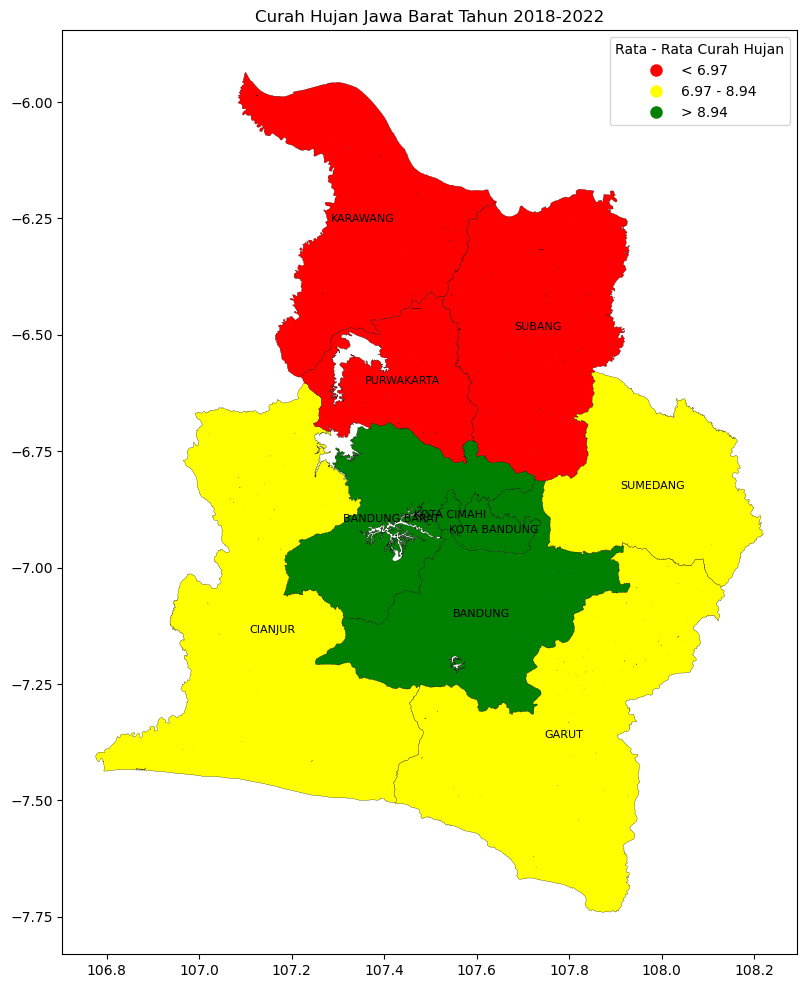

In [10]:
colors = ['green', 'yellow', 'red']
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
cmap = (matplotlib.colors.ListedColormap(['green', 'red', 'yellow']).with_extremes(over='0.25', under='0.75'))

map_jabar.plot(column='WARNA', cmap=cmap, legend=True, ax=ax, edgecolor='k', linewidth=0.2)
lower_limit_str = f'{lower_limit:.2f}'
upper_limit_str = f'{upper_limit:.2f}'

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'< {lower_limit_str}', markerfacecolor=colors[2], markersize=10),
                   Line2D([0], [0], marker='o', color='w', label=f'{lower_limit_str} - {upper_limit_str}', markerfacecolor=colors[1], markersize=10),
                   Line2D([0], [0], marker='o', color='w', label=f'> {upper_limit_str}', markerfacecolor=colors[0], markersize=10)]

ax.legend(handles=legend_elements, title='Rata - Rata Curah Hujan')
plt.title("Curah Hujan Jawa Barat Tahun 2018-2022")
for x, y, label in zip(map_jabar.geometry.centroid.x, map_jabar.geometry.centroid.y, map_jabar['KAB_KOTA']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center',
color='black')
plt.show()